<a href="https://colab.research.google.com/github/xslittlemaggie/Tencent_Education_Deep_Learning_Course/blob/master/MNIST_CNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Dense, Activation, Flatten

from keras.optimizers import SGD, adam, RMSprop

from keras.utils import np_utils
from keras import backend as K

# visualization
import matplotlib.pyplot as plt


Using TensorFlow backend.


## 读取数据

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape
y_train.shape

(60000,)

In [0]:
# the data, split between train and test sets
if K.image_data_format() == "channels_first":
  x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
  x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
  input_shape = (1, 28, 28)
else:
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
  input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train = x_train/255
#x_test = x_test/255

# convert class vectors to binary class matrics
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 模型建立

In [6]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("sigmoid"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))


# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'mse', optimizer = adam(), metrics = ["accuracy"]) # categorical_crossentropy

model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


## 模型训练

In [7]:
history_0 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 165us/step - loss: 0.0863 - acc: 0.3627 - val_loss: 0.0815 - val_acc: 0.3886
Epoch 2/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.0815 - acc: 0.3892 - val_loss: 0.0821 - val_acc: 0.3903
Epoch 3/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.0809 - acc: 0.3907 - val_loss: 0.0807 - val_acc: 0.3905
Epoch 4/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.0805 - acc: 0.3918 - val_loss: 0.0814 - val_acc: 0.3898
Epoch 5/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0804 - acc: 0.3920 - val_loss: 0.0805 - val_acc: 0.3914
Epoch 6/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.0802 - acc: 0.3933 - val_loss: 0.0800 - val_acc: 0.3922
Epoch 7/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.0802 - acc: 0.3929 - val_loss: 0.0798 - val

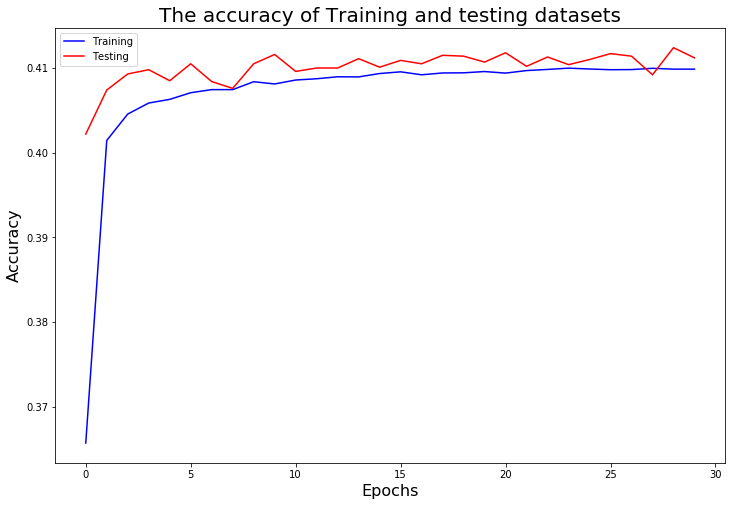

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_0.history["acc"], color = "b")
plt.plot(history_0.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

# 参数调节

## 调参 1. 数据归一化

In [0]:
x_train = x_train/255
x_test = x_test/255

## 调参 2. 增加网络的深度

## 调参 3: 激励函数 

## 调参 4: 目标函数

## 调参 5: 优化函数

## 调参 6: 批归一化（BN）

## 调参 7：Dropout

## 调参 8_1： 卷积核个数， 大小

## 调参 8_2： 卷积核个数， 大小, 更深

## 调参 9： batch size

## 调参 9： batch size, 更多次迭代